<a href="https://colab.research.google.com/github/yunhyeongil/docs-l10n/blob/master/%EC%9D%B4%EB%AF%B8%EC%A7%80%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Review : convolutional neural networks (CNNs)

In [21]:
!pwd


/content


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
!cd content

/bin/bash: line 0: cd: content: No such file or directory


In [4]:
!pwd


/content


In [22]:
!mkdir image

mkdir: cannot create directory ‘image’: File exists


In [6]:
!ls

drive  image  sample_data


In [23]:
!cp /content/101_ObjectCategories.tar.gz ./image/

In [24]:
!ls -al

total 128684
drwxr-xr-x 1 root root      4096 Jul  9 04:20 .
drwxr-xr-x 1 root root      4096 Jul  9 04:11 ..
-rw-r--r-- 1 root root 131740031 Jul  9 04:32 101_ObjectCategories.tar.gz
drwxr-xr-x 4 root root      4096 Jul  1 13:41 .config
drwx------ 6 root root      4096 Jul  9 04:18 drive
drwxr-xr-x 2 root root      4096 Jul  9 04:33 image
drwxr-xr-x 1 root root      4096 Jul  1 13:42 sample_data


In [25]:
%cd image

/content/image


In [10]:
!ls -al

total 8
drwxr-xr-x 2 root root 4096 Jul  9 04:18 .
drwxr-xr-x 1 root root 4096 Jul  9 04:18 ..


In [26]:
!tar xvfz ./101_ObjectCategories.tar.gz > test.log

In [27]:
!ls -al

total 129080
drwxr-xr-x   3 root root      4096 Jul  9 04:33 .
drwxr-xr-x   1 root root      4096 Jul  9 04:20 ..
drwxr-xr-x 104  411  300      4096 Nov  9  2004 101_ObjectCategories
-rw-r--r--   1 root root 131740031 Jul  9 04:33 101_ObjectCategories.tar.gz
-rw-r--r--   1 root root    418726 Jul  9 04:33 test.log


In [28]:
import os
os.chdir('../')
os.getcwd()

'/content'

In [29]:
import numpy as np
import os, glob
import cv2 
from sklearn.model_selection import train_test_split

caltech_dir = './image/101_ObjectCategories'
categories = ['chair', 'camera', 'butterfly', 'elephant', 'flamingo']
num_classes = len(categories)

In [30]:
w = 64
h = 64
pixels = w*h*3

X = []
Y = []

for idx, cat in enumerate(categories):
  label = [0 for i in range(num_classes)]
  label[idx] = 1
  print(f'label of {cat}: {label}')

  image_dir = os.path.join(caltech_dir,cat)
  print(image_dir)
  files = glob.glob(os.path.join(image_dir,'*.jpg'))

  for i, f in enumerate(files):
    
    img = cv2.imread(f) #img = Image.open(f)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #img = img.convert('RGB')
    img = cv2.resize(img, (w,h))
    
    X.append(img)
    Y.append(label)    

# convert to ndarray!
X = np.array(X)
Y = np.array(Y)

label of chair: [1, 0, 0, 0, 0]
./image/101_ObjectCategories/chair
label of camera: [0, 1, 0, 0, 0]
./image/101_ObjectCategories/camera
label of butterfly: [0, 0, 1, 0, 0]
./image/101_ObjectCategories/butterfly
label of elephant: [0, 0, 0, 1, 0]
./image/101_ObjectCategories/elephant
label of flamingo: [0, 0, 0, 0, 1]
./image/101_ObjectCategories/flamingo


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,Y)

xy = (X_train,X_test,y_train,y_test)
np.save('./image/5cat.npy',xy)
print('ok!', np.shape)
print('# of train samples:',len(X_train))
print('# of test samples:', len(X_test))

ok! <function shape at 0x7f09366197a0>
# of train samples: 250
# of test samples: 84


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


[0 0 0 1 0]


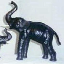

In [32]:
from google.colab.patches import cv2_imshow

idx = 10
print(y_train[idx])
# cv2_imshow(X_train[idx],cv2.COLOR_BGR2RGB)
cv2_imshow(cv2.cvtColor(X_train[idx],cv2.COLOR_BGR2RGB))

In [33]:
import tensorflow_datasets as tfds
import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((X_train,y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test,y_test))
train_dataset

<TensorSliceDataset shapes: ((64, 64, 3), (5,)), types: (tf.uint8, tf.int64)>

In [34]:
batch_train_dataset = train_dataset.batch(batch_size=8,drop_remainder=True)
batch_test_dataset = test_dataset.batch(batch_size=8,drop_remainder=True)
batch_train_dataset

<BatchDataset shapes: ((8, 64, 64, 3), (8, 5)), types: (tf.uint8, tf.int64)>

In [35]:
def format_label(label):
  string_label = categories[tf.math.argmax(label)]
  return string_label


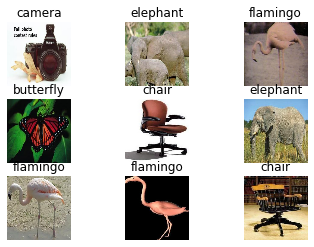

In [36]:
import matplotlib.pyplot as plt

for i, (image, label) in enumerate(train_dataset.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image.numpy().astype("uint8"))
    plt.title(f"{format_label(label)}")
    plt.axis("off")

In [37]:
from tensorflow.keras import layers, models

In [38]:
inputs = layers.Input(shape=(w,h,3))
x = layers.Conv2D(32,3,3,
                  #activation='relu',
                  padding='same')(inputs)
x = layers.Activation('relu')(x)
x = layers.MaxPooling2D(pool_size=(2,2))(x)
x = layers.Dropout(0.25)(x)

x = layers.Conv2D(64,3,3,
                  #activation='relu',
                  padding='same')(x)
x = layers.Activation('relu')(x)
x = layers.Conv2D(64,3,3,                  
                  #activation='relu',
                  padding='same')(x)                  
x = layers.MaxPooling2D(pool_size=(2,2))(x)
x = layers.Dropout(0.25)(x)

x = layers.Flatten()(x)
x = layers.Dense(512)(x)
x = layers.Activation('relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(num_classes)(x)
outputs = layers.Activation('softmax')(x)

model = models.Model(inputs = inputs, outputs= outputs)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

epochs = 40 # @param {type:'slider', min:10, max:100}
hist = model.fit(batch_train_dataset,
                 epochs=epochs,
                 validation_data = batch_test_dataset,
                 verbose=2)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 22, 22, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 22, 22, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
activation_1 (Activation)    (None, 4, 4, 64)          0     

In [39]:
score = model.evaluate(batch_test_dataset)
print(f'loss={score[0]}')
print(f'accuracy={score[1]}')

10/10 [==============================] - 0s 2ms/step - loss: 1.8203 - accuracy: 0.5375
loss=1.8202688694000244
accuracy=0.5375000238418579


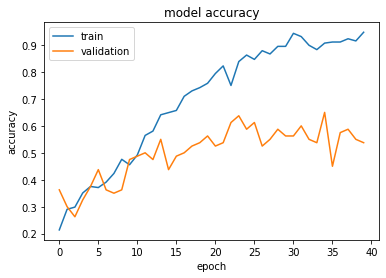

In [40]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

plot_hist(hist)

In [41]:
pres = model.predict(X_test)
print(pres.shape)

error_img_dir = os.path.join('.','error')
try: 
  os.mkdir('error')
except FileExistsError as e:
  print(e)

cnt = 0
for idx,(pre_prob,ans_onehot) in enumerate(zip(pres, y_test)):  
  pre = pre_prob.argmax()
  ans = ans_onehot.argmax()
  if pre == ans:
    continue
  cnt += 1
  print(f'Error: predicted {format_label(pre_prob)} != label {format_label(ans_onehot)}')
  fstr = os.path.join(error_img_dir,f'{idx:02d}-{format_label(pre_prob)}-ne-{format_label(ans_onehot)}.png')
  cv2.imwrite(fstr, X_test[idx])

print(f'Error Rate = {cnt}/{len(X_test)}')
  

(84, 5)
Error: predicted flamingo != label butterfly
Error: predicted flamingo != label chair
Error: predicted flamingo != label elephant
Error: predicted flamingo != label chair
Error: predicted elephant != label camera
Error: predicted chair != label elephant
Error: predicted elephant != label camera
Error: predicted flamingo != label camera
Error: predicted elephant != label camera
Error: predicted flamingo != label butterfly
Error: predicted flamingo != label butterfly
Error: predicted flamingo != label butterfly
Error: predicted flamingo != label elephant
Error: predicted butterfly != label flamingo
Error: predicted chair != label elephant
Error: predicted flamingo != label chair
Error: predicted camera != label butterfly
Error: predicted flamingo != label butterfly
Error: predicted flamingo != label elephant
Error: predicted elephant != label chair
Error: predicted elephant != label flamingo
Error: predicted butterfly != label chair
Error: predicted flamingo != label butterfly
Er

In [42]:
from tensorflow.keras import models
# Calling `save('my_model')` creates a SavedModel folder `my_model`.
model.save("my_model")

# It can be used to reconstruct the model identically.
reconstructed_model = models.load_model("my_model")

# Let's check:
np.testing.assert_allclose(
    model.predict(X_test), reconstructed_model.predict(X_test)
)

# ============================================================
# The reconstructed model is already compiled and has retained the optimizer
# state, so training can resume:
reconstructed_model.fit(batch_train_dataset) # batch를 잡고...
#reconstructed_model.fit(X_test, X_test)

INFO:tensorflow:Assets written to: my_model/assets
31/31 [==============================] - 1s 3ms/step - loss: 0.2759 - accuracy: 0.9032


In [43]:
from tensorflow.keras.applications.resnet50 import  ResNet50
inputs = layers.Input(shape=(w,h,3))
outputs = ResNet50(include_top=True, 
                         weights=None,
                         input_shape=(w,h,3),
                         classes=num_classes)(inputs)

model = models.Model(inputs = inputs, outputs= outputs)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

epochs = 40 # @param {type:'slider', min:10, max:100}

# hist = model.fit(X_train, y_train,
#                  epochs=epochs,
#                  #validation_data = (X_test, y_test),
#                  )
hist = model.fit(batch_train_dataset,
                 epochs=epochs,
                 validation_data = batch_test_dataset,
                 verbose=2)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
resnet50 (Functional)        (None, 5)                 23597957  
Total params: 23,597,957
Trainable params: 23,544,837
Non-trainable params: 53,120
_________________________________________________________________
Epoch 1/40
31/31 - 8s - loss: 3.8579 - accuracy: 0.2379 - val_loss: 45.6355 - val_accuracy: 0.2750
Epoch 2/40
31/31 - 1s - loss: 1.9297 - accuracy: 0.3387 - val_loss: 3.5967 - val_accuracy: 0.3000
Epoch 3/40
31/31 - 1s - loss: 0.9051 - accuracy: 0.6855 - val_loss: 2.1204 - val_accuracy: 0.3250
Epoch 4/40
31/31 - 1s - loss: 1.7287 - accuracy: 0.5081 - val_loss: 12.7479 - val_accuracy: 0.2750
Epoch 5/40
31/31 - 1s - loss: 1.6056 - accuracy: 0.5202 - val_loss: 4.0700 - val_accuracy: 0.3750
Epoch 6/40
3

In [44]:
from tensorflow.keras.applications.efficientnet import  EfficientNetB0

inputs = layers.Input(shape=(w,h,3))
outputs = EfficientNetB0(include_top=True, 
                         weights=None,
                         input_shape=(w,h,3),
                         classes=num_classes)(inputs)

model = models.Model(inputs = inputs, outputs= outputs)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

epochs = 40 # @param {type:'slider', min:10, max:100}

# hist = model.fit(X_train, y_train,
#                  epochs=epochs,
#                  #validation_data = (X_test, y_test),
#                  )
hist = model.fit(batch_train_dataset,
                 epochs=epochs,
                 validation_data = batch_test_dataset,
                 verbose=2)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, 5)                 4055976   
Total params: 4,055,976
Trainable params: 4,013,953
Non-trainable params: 42,023
_________________________________________________________________
Epoch 1/40
31/31 - 10s - loss: 6.8475 - accuracy: 0.2581 - val_loss: 2.0212 - val_accuracy: 0.1125
Epoch 2/40
31/31 - 1s - loss: 4.7617 - accuracy: 0.2581 - val_loss: 1.9780 - val_accuracy: 0.2750
Epoch 3/40
31/31 - 1s - loss: 2.9473 - accuracy: 0.4556 - val_loss: 1.7563 - val_accuracy: 0.1250
Epoch 4/40
31/31 - 1s - loss: 1.9777 - accuracy: 0.5565 - val_loss: 1.7409 - val_accuracy: 0.2250
Epoch 5/40
31/31 - 1s - loss: 1.9206 - accuracy: 0.6331 - val_loss: 2.1615 - val_accuracy: 0.2625
Epoch 6/40
31/3

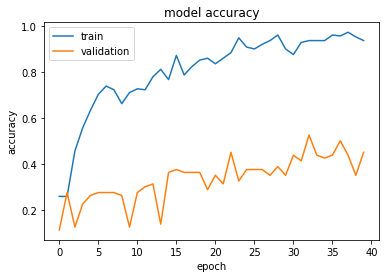

In [45]:
plot_hist(hist)

In [46]:
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

img_augmentation = Sequential(
  [
    # representing lower and upper bound for rotating clockwise and counter-clockwise. 
    preprocessing.RandomRotation(factor=0.15), # a float represented as fraction of 2pi, ex :0.15 (= 54 degree!) 
    
    preprocessing.RandomTranslation(height_factor=0.1, # lower and upper bound for shifting vertically
                                    width_factor=0.1 #lower and upper bound for shifting horizontally.
                                    ),
    preprocessing.RandomFlip(), # Randomly flip each image horizontally and vertically.
    preprocessing.RandomContrast(factor=0.1),
  ],
  name="img_augmentation",
)

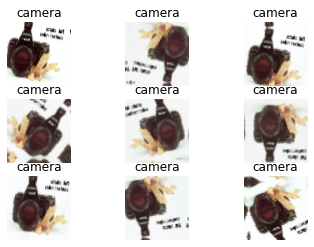

In [47]:
for image, label in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    aug_img = img_augmentation(tf.expand_dims(image, axis=0))
    plt.imshow(aug_img[0].numpy().astype("uint8"))
    
    plt.title(f"{format_label(label)}")
    plt.axis("off")

In [48]:
from tensorflow.keras.applications.efficientnet import  EfficientNetB0
from tensorflow.keras import layers, models
from tensorflow.keras import layers

inputs = layers.Input(shape=(w,h,3))
x = img_augmentation(inputs)
outputs = EfficientNetB0(include_top=True, 
                         weights=None,
                         input_shape=(w,h,3),
                         classes=num_classes)(x)

model = models.Model(inputs = inputs, outputs= outputs)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

epochs = 200 # @param {type:'slider', min:10, max:200}
batch_size = 8

hist = model.fit(batch_train_dataset,
                 epochs=epochs,
                 validation_data = batch_test_dataset,
                 verbose=2)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
img_augmentation (Sequential (None, 64, 64, 3)         0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, 5)                 4055976   
Total params: 4,055,976
Trainable params: 4,013,953
Non-trainable params: 42,023
_________________________________________________________________
Epoch 1/200
31/31 - 9s - loss: 6.6825 - accuracy: 0.2097 - val_loss: 1.8496 - val_accuracy: 0.1250
Epoch 2/200
31/31 - 1s - loss: 5.7986 - accuracy: 0.1976 - val_loss: 2.3119 - val_accuracy: 0.1250
Epoch 3/200
31/31 - 1s - loss: 3.5617 - accuracy: 0.2540 - val_loss: 1.9186 - val_accuracy: 0.1125
Epoch 4/200
31/31 - 1s - loss: 2.8299 - accuracy: 0.2863 - val_loss: 2.3134 -

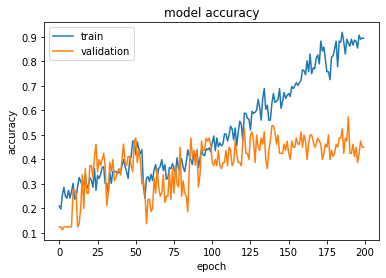

In [49]:
plot_hist(hist)

16711680/16705208 [==============================] - 0s 0us/step
Epoch 1/25
31/31 - 6s - loss: 1.6716 - accuracy: 0.5806 - val_loss: 1.3044 - val_accuracy: 0.6750
Epoch 2/25
31/31 - 0s - loss: 1.1559 - accuracy: 0.7500 - val_loss: 0.8472 - val_accuracy: 0.7375
Epoch 3/25
31/31 - 0s - loss: 1.0152 - accuracy: 0.7944 - val_loss: 0.6722 - val_accuracy: 0.7500
Epoch 4/25
31/31 - 0s - loss: 0.5422 - accuracy: 0.8669 - val_loss: 0.8147 - val_accuracy: 0.7625
Epoch 5/25
31/31 - 0s - loss: 0.8095 - accuracy: 0.8226 - val_loss: 1.3448 - val_accuracy: 0.6625
Epoch 6/25
31/31 - 0s - loss: 0.8810 - accuracy: 0.8548 - val_loss: 0.9457 - val_accuracy: 0.8000
Epoch 7/25
31/31 - 0s - loss: 0.6960 - accuracy: 0.8468 - val_loss: 0.6879 - val_accuracy: 0.8500
Epoch 8/25
31/31 - 0s - loss: 0.7084 - accuracy: 0.8669 - val_loss: 0.6418 - val_accuracy: 0.8375
Epoch 9/25
31/31 - 0s - loss: 0.7967 - accuracy: 0.8548 - val_loss: 0.6615 - val_accuracy: 0.8125
Epoch 10/25
31/31 - 0s - loss: 0.8714 - accuracy: 0.8

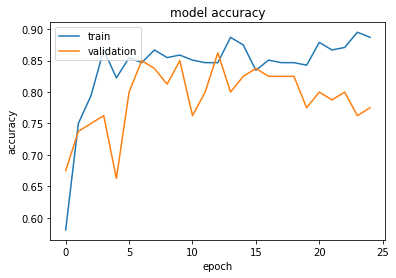

In [50]:
inputs = layers.Input(shape=(w,h,3))
x = img_augmentation(inputs)
model = EfficientNetB0(include_top=False, 
                       input_tensor=x, 
                       weights="imagenet")

# Freeze the pretrained weights
model.trainable = False

# Rebuild top
x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
x = layers.BatchNormalization()(x)

top_dropout_rate = 0.2
x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
outputs = layers.Dense(num_classes, 
                       activation="softmax", 
                       name="pred")(x)

# Compile
model = tf.keras.Model(inputs, outputs, name="EfficientNet")
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
model.compile(optimizer=optimizer, 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])

epochs = 25  # @param {type: "slider", min:8, max:80}
hist = model.fit(batch_train_dataset,
                 epochs=epochs,
                 validation_data = batch_test_dataset,
                 verbose=2)
plot_hist(hist)

In [51]:
model.summary()

Model: "EfficientNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
img_augmentation (Sequential)   (None, 64, 64, 3)    0           input_8[0][0]                    
__________________________________________________________________________________________________
rescaling_2 (Rescaling)         (None, 64, 64, 3)    0           img_augmentation[1][0]           
__________________________________________________________________________________________________
normalization_2 (Normalization) (None, 64, 64, 3)    7           rescaling_2[0][0]                
_______________________________________________________________________________________

Epoch 1/15
31/31 - 7s - loss: 0.8187 - accuracy: 0.8952 - val_loss: 2.5060 - val_accuracy: 0.8125
Epoch 2/15
31/31 - 0s - loss: 0.6024 - accuracy: 0.8992 - val_loss: 2.2930 - val_accuracy: 0.8250
Epoch 3/15
31/31 - 0s - loss: 0.4024 - accuracy: 0.9274 - val_loss: 2.0621 - val_accuracy: 0.8250
Epoch 4/15
31/31 - 0s - loss: 0.3632 - accuracy: 0.9476 - val_loss: 2.1733 - val_accuracy: 0.8000
Epoch 5/15
31/31 - 0s - loss: 0.6324 - accuracy: 0.9355 - val_loss: 2.1368 - val_accuracy: 0.8000
Epoch 6/15
31/31 - 0s - loss: 0.7405 - accuracy: 0.8831 - val_loss: 1.8534 - val_accuracy: 0.8500
Epoch 7/15
31/31 - 0s - loss: 0.3391 - accuracy: 0.9476 - val_loss: 1.6169 - val_accuracy: 0.8625
Epoch 8/15
31/31 - 0s - loss: 0.4502 - accuracy: 0.9194 - val_loss: 1.3913 - val_accuracy: 0.9125
Epoch 9/15
31/31 - 0s - loss: 0.3055 - accuracy: 0.9476 - val_loss: 1.5519 - val_accuracy: 0.9125
Epoch 10/15
31/31 - 0s - loss: 0.3117 - accuracy: 0.9234 - val_loss: 1.6085 - val_accuracy: 0.9000
Epoch 11/15
31/31 -

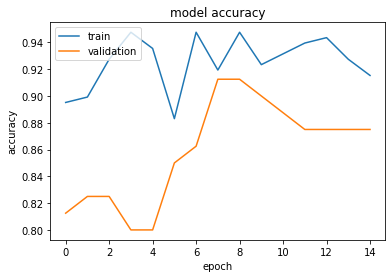

In [52]:
def unfreeze_model(model):
    # We unfreeze the top 20 layers while leaving BatchNorm layers frozen
    for layer in model.layers[-20:]:
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True

    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )


unfreeze_model(model)

epochs = 15  # @param {type: "slider", min:8, max:50}
hist = model.fit(batch_train_dataset,
                 epochs=epochs,
                 validation_data = batch_test_dataset,
                 verbose=2)
plot_hist(hist)